# Introduction to Recommendation system

<div align="center">
  <img src="./images/social_media_recommendation.png" alt="Recommendation Systems Overview" width="800">
</div>

A **Recommendation System** is a type of information filtering system that predicts and suggests items to users based on their preferences, behavior, or past interactions. These systems are widely used in applications such as e-commerce, streaming platforms, social media, and more.

<div align="center">
  <img src="./images/recommendation%20system%20users.png" alt="Recommendation System Use Cases" width="600">
</div>

### use cases of recommendation system 

Recommendation systems are widely used to enhance user experience and engagement across various domains:

- **E-commerce**: Product recommendations based on user behavior.
- **Streaming Services**: Movie, show, and music suggestions.
- **Social Media**: Content and friend recommendations.
- **Online News**: Article and topic recommendations.

**Recommendation systems are not only convenient for users but also drive business growth by improving engagement and conversion rates.**
Driving sales, increasing user retention, and boosting customer satisfaction through personalized experiences.

<div align="center">
  <img src="D:\pujan\cs50\images\recommendation system uses.png" alt="Recommendation System Use Cases" width="600">
</div>

# Types of Recommendation Systems

1. **Content-Based**: Recommends items similar to what the user has liked, based on item features (e.g., product description, movie genre).

2. **Collaborative Filtering**: Recommends items by analyzing users' past behavior and preferences, using either **user-user** or **item-item** similarities.

3. **Hybrid**: Combines content-based and collaborative methods to improve recommendation accuracy and diversity.


### Today's Goal:
- Build a simple content-based recommendation system to recommend articles based on their title and content.
- Dataset: Deskdrop, containing user-shared articles with relevant information.

### Step-by-Step Plan:
1. **Data Cleaning**: Handle missing values, remove duplicates, and preprocess text.
2. **Exploratory Data Analysis (EDA)**: Understand the dataset, visualize distributions.
3. **Data Preprocessing**: Convert text data to numerical features (e.g., using TF-IDF).
4. **Modeling**: Build the recommendation model using similarity measures (e.g., cosine similarity).
5. **Evaluation**: Test the model’s performance and fine-tune if necessary.


## Fill the code cells replacing the **`<mask>`**

# Let's get started !!

#### Import the required libraries such as numpy, pandas, matplotlib,etc

In [2]:
# !pip install nltk wordcloud

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Read the csv files using pandas

In [4]:
df = pd.read_csv('shared_articles.csv')

In [5]:
assert df["timestamp"][0] == 1459192779, "Incorrect file"

## PRELIMINARY DATA PREPROCESSING

#### find out the shape and other info of the dataframe

In [6]:
df.shape

(3122, 13)

In [7]:
assert df.shape[0] == 3122, "Assertion Failed! Try again"

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        3122 non-null   int64 
 1   eventType        3122 non-null   object
 2   contentId        3122 non-null   int64 
 3   authorPersonId   3122 non-null   int64 
 4   authorSessionId  3122 non-null   int64 
 5   authorUserAgent  680 non-null    object
 6   authorRegion     680 non-null    object
 7   authorCountry    680 non-null    object
 8   contentType      3122 non-null   object
 9   url              3122 non-null   object
 10  title            3122 non-null   object
 11  text             3122 non-null   object
 12  lang             3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


#### Find out the all columns name of the df

In [9]:
columns = df.columns
columns

Index(['timestamp', 'eventType', 'contentId', 'authorPersonId',
       'authorSessionId', 'authorUserAgent', 'authorRegion', 'authorCountry',
       'contentType', 'url', 'title', 'text', 'lang'],
      dtype='object')

#### find out the missing values

In [10]:
df.isna()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,False,False,False,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,False,False,False,False,False,False,False,False,False,False,False,False,False
3118,False,False,False,False,False,False,False,False,False,False,False,False,False
3119,False,False,False,False,False,False,False,False,False,False,False,False,False
3120,False,False,False,False,False,False,False,False,False,False,False,False,False


#### many columns contains many missing values and also we don't need other columns . so, removing unneccesary columns

#### Hint :- you can use **drop()** method to remove the columns

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(680, 13)

In [13]:
df.shape

(680, 13)

In [14]:
assert df.shape[1] == 13, "Assertion Failed ! Try again "

In [15]:
df.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
2442,1474982976,CONTENT SHARED,6031953227014493100,-35428957105270993,2954312914497351516,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,MG,BR,HTML,http://epoca.globo.com/vida/noticia/2016/09/o-...,O chefe é gay. E daí?,O técnico de laboratório de cinema Lucca Najar...,pt
2443,1474985039,CONTENT SHARED,-7638840925036528150,-3203894957285229214,3585854664925733577,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,ON,CA,HTML,https://blog.docker.com/2016/09/dockerforws2016/,Introducing Docker for Windows Server 2016 - D...,"Today, Microsoft is announcing general availab...",en
2444,1474991327,CONTENT SHARED,-1676378465482420452,5660542693104786364,3377959081859050551,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,SP,BR,HTML,http://newsroom.bankofamerica.com/press-releas...,Microsoft and Bank of America Merrill Lynch Co...,"Today at Sibos, an annual conference organized...",en
2445,1474992827,CONTENT SHARED,-1150591229250318592,6960073744377754728,7794013629444506686,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,GA,US,HTML,https://medium.com/posted-by-sypartners/digiti...,Digitization and The Loss of Iconography - Pos...,It's not the first time iconography has change...,en
2446,1474993822,CONTENT SHARED,-2487699318115820990,-1479311724257856983,5693827395561674937,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,HTML,http://tech.firstpost.com/news-analysis/google...,"Google saves Allo conversations, a win for mac...","Google has been teasing Allo , an instant mess...",en


#### We will only use English language articles for now.

#### First check how many different languages are present in this dataset

In [16]:
df['lang'].value_counts()

lang
en    473
pt    207
Name: count, dtype: int64

Now, use filtering condition to remove all other values except for english

In [17]:
df = df.loc[df['lang'] == "en", ['title','text']]

In [18]:
# assert df.shape == (2264,2), "Assertion Failed !"

In [19]:
df.shape

(473, 2)

In [20]:
df.head()

,title,text
2443,Introducing Docker for Windows Server 2016 - D...,"Today, Microsoft is announcing general availab..."
2444,Microsoft and Bank of America Merrill Lynch Co...,"Today at Sibos, an annual conference organized..."
2445,Digitization and The Loss of Iconography - Pos...,It's not the first time iconography has change...
2446,"Google saves Allo conversations, a win for mac...","Google has been teasing Allo , an instant mess..."
2447,"A Neural Network for Machine Translation, at P...","Ten years ago, we announced the launch of Goog..."


### Now Check for any duplicates row. if yes, remove it 

Hint: You can use read the documentation for **[checking](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)** and **[removing](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)** the duplicates

In [21]:
df.drop_duplicates()

,title,text
2443,Introducing Docker for Windows Server 2016 - D...,"Today, Microsoft is announcing general availab..."
2444,Microsoft and Bank of America Merrill Lynch Co...,"Today at Sibos, an annual conference organized..."
2445,Digitization and The Loss of Iconography - Pos...,It's not the first time iconography has change...
2446,"Google saves Allo conversations, a win for mac...","Google has been teasing Allo , an instant mess..."
2447,"A Neural Network for Machine Translation, at P...","Ten years ago, we announced the launch of Goog..."
...,...,...
3116,Swift Top 10 Articles For The Past Year (v.2017),"For the past year , we've ranked nearly 9,000 ..."
3118,Amazon takes on Skype and GoToMeeting with its...,"Amazon has launched Chime, a video conferencin..."
3119,Code.org 2016 Annual Report,"February 9, 2017 - We begin each year with a l..."
3120,JPMorgan Software Does in Seconds What Took La...,"At JPMorgan Chase & Co., a learning machine is..."


In [22]:
df.shape

(473, 2)

In [23]:
# assert df.shape == (2191,2), "Assertion Failed !"

In [24]:
df.head()

,title,text
2443,Introducing Docker for Windows Server 2016 - D...,"Today, Microsoft is announcing general availab..."
2444,Microsoft and Bank of America Merrill Lynch Co...,"Today at Sibos, an annual conference organized..."
2445,Digitization and The Loss of Iconography - Pos...,It's not the first time iconography has change...
2446,"Google saves Allo conversations, a win for mac...","Google has been teasing Allo , an instant mess..."
2447,"A Neural Network for Machine Translation, at P...","Ten years ago, we announced the launch of Goog..."


#### we can see that after dropping duplicates , the index has also dropped. use suitable function to reset the index

In [25]:
# df = df.shape

In [26]:
# df.shape

In [27]:
df.head()

,title,text
2443,Introducing Docker for Windows Server 2016 - D...,"Today, Microsoft is announcing general availab..."
2444,Microsoft and Bank of America Merrill Lynch Co...,"Today at Sibos, an annual conference organized..."
2445,Digitization and The Loss of Iconography - Pos...,It's not the first time iconography has change...
2446,"Google saves Allo conversations, a win for mac...","Google has been teasing Allo , an instant mess..."
2447,"A Neural Network for Machine Translation, at P...","Ten years ago, we announced the launch of Goog..."


In [28]:
df1 = df.copy()

## EXPLORATORY DATA ANALYSIS

### Couting the number of words in each text rows

Hint :- use your own technique such as making a function to count no of word or manipulation the particular series directly  and make a new column as 'no_of_words'. 
You can use python inbuilt string methods along with regular expressions.
**regular expression** or **regex** is a inbuilt module for advanced pattern matching and text manipulation

firstly, we will remove extra whitespaces if present because it may interfere with the real counting of the words
and also lowerscaping the characters

In [29]:
import re 

def remove_whitespaces(row):
    pattern = r"\s+"
    row = re.sub(pattern," ",row).lower()
    return row

#### Now apply the **remove_whitespaces** function to **title** and **text** columns

In [30]:
df["title"]= df['title'].apply(remove_whitespaces)
df["text"]= df['text'].apply(remove_whitespaces)

In [31]:
df.head()

,title,text
2443,introducing docker for windows server 2016 - d...,"today, microsoft is announcing general availab..."
2444,microsoft and bank of america merrill lynch co...,"today at sibos, an annual conference organized..."
2445,digitization and the loss of iconography - pos...,it's not the first time iconography has change...
2446,"google saves allo conversations, a win for mac...","google has been teasing allo , an instant mess..."
2447,"a neural network for machine translation, at p...","ten years ago, we announced the launch of goog..."


#### Now make a column to store the count of no of words 
Hint: You can use split() method 

In [32]:
df["no_of_words"] = df["text"].str.split(" ").apply(len)

# VISUALIZATION
#### "Data is not just numbers; it's a story waiting to be visualized. A well-crafted visualization can tell you a thousand insights."


Apply right visualization techniques to see how the no of words are scattered across each row of data 

#### Hint: You can use **histogram** either using **matplotlib** or **seaborn** 

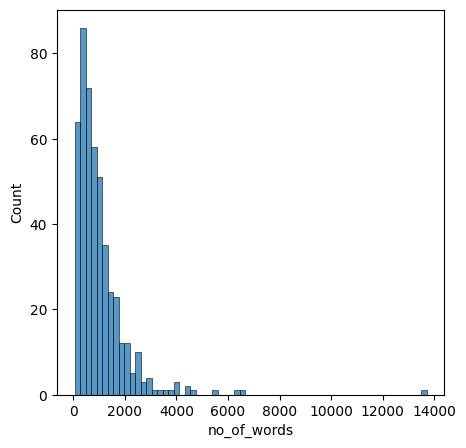

In [33]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.histplot(df["no_of_words"])
plt.show()

#### Now, visualize the unique no. of words present in each rows for this data 

In [34]:
df["unique_no_of_words"] = df["text"].str.split(" ").apply(set).apply(len)

In [35]:
df.head()

,title,text,no_of_words,unique_no_of_words
2443,introducing docker for windows server 2016 - d...,"today, microsoft is announcing general availab...",1296,500
2444,microsoft and bank of america merrill lynch co...,"today at sibos, an annual conference organized...",890,448
2445,digitization and the loss of iconography - pos...,it's not the first time iconography has change...,413,257
2446,"google saves allo conversations, a win for mac...","google has been teasing allo , an instant mess...",378,206
2447,"a neural network for machine translation, at p...","ten years ago, we announced the launch of goog...",952,486


In [36]:
df['unique_no_of_words']

2443     500
2444     448
2445     257
2446     206
2447     486
        ... 
3116     122
3118     193
3119    1020
3120     578
3121      36
Name: unique_no_of_words, Length: 473, dtype: int64

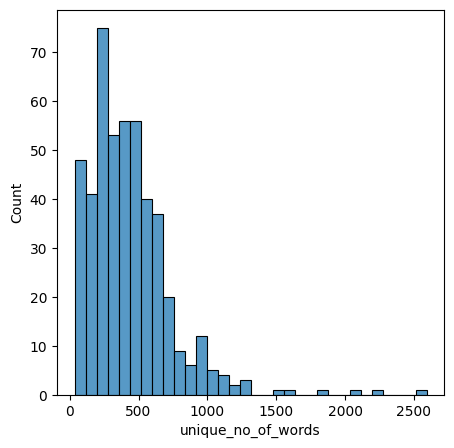

In [37]:
plt.figure(figsize=(5,5))
sns.histplot(df["unique_no_of_words"])
plt.show()

## NLP DATA PREPROCESSING (may vary accoringly to specific NLP Tasks)

### Removal of punctuations and numbers (yo paxi modelling garda thapako)

In [38]:
import string 

def remove_punctuations(row):
    punctuation = re.escape(string.punctuation)
    pattern = f"[{punctuation}0-9]"
    row = re.sub(pattern,"",row)
    return row

#### Now apply the **remove_punctuations** to the **title** and **text** columns

In [39]:
df["title"] = df['title'].apply(remove_punctuations)
df["text"] = df['text'].apply(remove_punctuations)

In [40]:
df.head()

,title,text,no_of_words,unique_no_of_words
2443,introducing docker for windows server docker...,today microsoft is announcing general availabi...,1296,500
2444,microsoft and bank of america merrill lynch co...,today at sibos an annual conference organized ...,890,448
2445,digitization and the loss of iconography post...,its not the first time iconography has changed...,413,257
2446,google saves allo conversations a win for mach...,google has been teasing allo an instant messa...,378,206
2447,a neural network for machine translation at pr...,ten years ago we announced the launch of googl...,952,486


### STOPWORD REMOVALS

Stopwords are common words (e.g., "the", "is", "in", "and") that don't carry significant meaning in text analysis. They are typically removed in NLP tasks because they occur frequently across texts but do not contribute to distinguishing meaningful patterns or relationships.

#### Why Remove Stopwords?
- **Reduce noise**: They can dominate text data and hinder meaningful analysis.
- **Improve efficiency**: Removing stopwords reduces dimensionality and computation time.
- **Enhance model performance**: Focusing on important words helps in building better models for tasks like text classification, information retrieval,etc.

You can make your own list of frequently used stopwords or either use stopwords provided by the packages such as **nltk**, **scikit-learn**,etc

In [41]:
import nltk
from nltk.corpus import stopwords

In [42]:
%%time

nltk.download('stopwords')

CPU times: total: 109 ms
Wall time: 346 ms


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
words = stopwords.words('english')

In [44]:
len(words)

179

In [45]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
len(ENGLISH_STOP_WORDS)

318

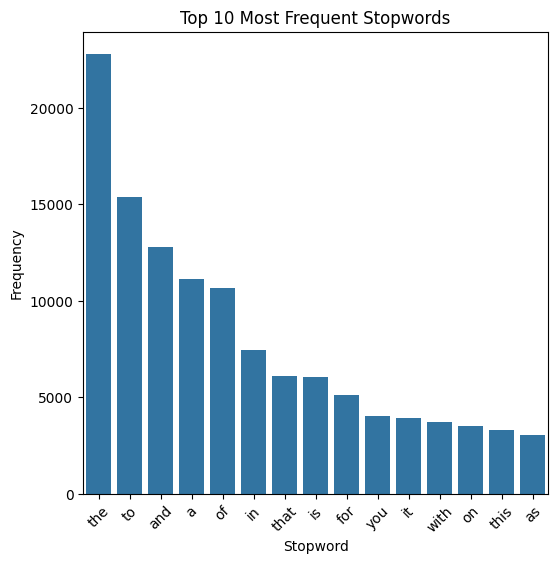

In [46]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

stopwords = [word for text in df['text'] for word in text.split() if word.lower() in ENGLISH_STOP_WORDS]
stopword_counts = Counter(stopwords)

# Plot top 15 stopwords
stopword_freq = stopword_counts.most_common(15)
stopword_words, stopword_freqs = zip(*stopword_freq)

plt.figure(figsize=(6, 6))
sns.barplot(x=list(stopword_words), y=list(stopword_freqs))
plt.title('Top 10 Most Frequent Stopwords')
plt.xlabel('Stopword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


#### Make **remove_stopwords** function to remove stopwords

In [47]:
def remove_stopwords(row):
    row = row.split(" ")
    row =[word for word in words if word not in ENGLISH_STOP_WORDS]
    return " ".join(row)

#### Make new dataframe named as **df**

In [48]:
df

,title,text,no_of_words,unique_no_of_words
2443,introducing docker for windows server docker...,today microsoft is announcing general availabi...,1296,500
2444,microsoft and bank of america merrill lynch co...,today at sibos an annual conference organized ...,890,448
2445,digitization and the loss of iconography post...,its not the first time iconography has changed...,413,257
2446,google saves allo conversations a win for mach...,google has been teasing allo an instant messa...,378,206
2447,a neural network for machine translation at pr...,ten years ago we announced the launch of googl...,952,486
...,...,...,...,...
3116,swift top articles for the past year v,for the past year weve ranked nearly swift a...,161,122
3118,amazon takes on skype and gotomeeting with its...,amazon has launched chime a video conferencing...,297,193
3119,codeorg annual report,february we begin each year with a look at ...,2662,1020
3120,jpmorgan software does in seconds what took la...,at jpmorgan chase co a learning machine is pa...,1029,578


#### make new columns **title** and **text** in **df** by applying **remove_stopwords** to the **df** columns

In [49]:
df["title"] = df['title'].apply(remove_stopwords)
df["text"] = df['text'].apply(remove_stopwords)

In [50]:
df.head()

,title,text,no_of_words,unique_no_of_words
2443,you're you've you'll you'd she's it's theirs t...,you're you've you'll you'd she's it's theirs t...,1296,500
2444,you're you've you'll you'd she's it's theirs t...,you're you've you'll you'd she's it's theirs t...,890,448
2445,you're you've you'll you'd she's it's theirs t...,you're you've you'll you'd she's it's theirs t...,413,257
2446,you're you've you'll you'd she's it's theirs t...,you're you've you'll you'd she's it's theirs t...,378,206
2447,you're you've you'll you'd she's it's theirs t...,you're you've you'll you'd she's it's theirs t...,952,486


# STEMMIZATION and LEMMATIZATION 

## Stemmization vs Lemmatization in NLP

### 1. Stemmization
- **Definition**: Reduces words to their root form by removing suffixes using predefined rules.
- **Result**: The root may not be a valid word.
- **Example**:
  - Running → Run
  - Caring → Car
  - Plays → Play
  - Happiness → Happi

### 2. Lemmatization
- **Definition**: Reduces words to their dictionary form (lemma) using context and part-of-speech.
- **Result**: The reduced form is always a valid word.
- **Example**:
  - Running → Run (verb)
  - Better → Good (adjective)
  - Caring → Care (noun/verb)
  - Happiness → Happiness (noun)

### Conclusion:
- **Stemmization** is faster but less accurate.
- **Lemmatization** is more accurate but slower.
- **Deep Learning models** (e.g., BERT, GPT) often reduce the need for both.


In [51]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer  #stemming tool
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [52]:
stemmer = PorterStemmer()

In [53]:
def stem_words(row):
    tokens = word_tokenize(row)
    steamed_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(steamed_tokens)

#### apply **stem_words** function to **title** and **text** column of **df**

In [86]:
%%time
df["title"] = df["title"].apply(stem_words)
df["text"] = df["text"].apply(stem_words)

CPU times: total: 1.14 s
Wall time: 1.19 s


In [55]:
df.tail()

,title,text,no_of_words,unique_no_of_words
3116,you 're you 've you 'll you 'd she 's it 's th...,you 're you 've you 'll you 'd she 's it 's th...,161,122
3118,you 're you 've you 'll you 'd she 's it 's th...,you 're you 've you 'll you 'd she 's it 's th...,297,193
3119,you 're you 've you 'll you 'd she 's it 's th...,you 're you 've you 'll you 'd she 's it 's th...,2662,1020
3120,you 're you 've you 'll you 'd she 's it 's th...,you 're you 've you 'll you 'd she 's it 's th...,1029,578
3121,you 're you 've you 'll you 'd she 's it 's th...,you 're you 've you 'll you 'd she 's it 's th...,55,36


#### make a new column **data** by concatenating the **title** and **text** column of **df**

In [56]:
df["data"] = df['title'] + df['text']

In [57]:
df.tail()

,title,text,no_of_words,unique_no_of_words,data
3116,you 're you 've you 'll you 'd she 's it 's th...,you 're you 've you 'll you 'd she 's it 's th...,161,122,you 're you 've you 'll you 'd she 's it 's th...
3118,you 're you 've you 'll you 'd she 's it 's th...,you 're you 've you 'll you 'd she 's it 's th...,297,193,you 're you 've you 'll you 'd she 's it 's th...
3119,you 're you 've you 'll you 'd she 's it 's th...,you 're you 've you 'll you 'd she 's it 's th...,2662,1020,you 're you 've you 'll you 'd she 's it 's th...
3120,you 're you 've you 'll you 'd she 's it 's th...,you 're you 've you 'll you 'd she 's it 's th...,1029,578,you 're you 've you 'll you 'd she 's it 's th...
3121,you 're you 've you 'll you 'd she 's it 's th...,you 're you 've you 'll you 'd she 's it 's th...,55,36,you 're you 've you 'll you 'd she 's it 's th...


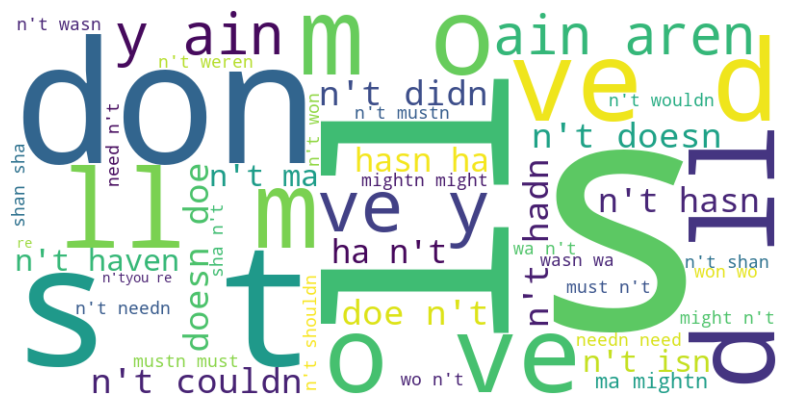

In [58]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(' '.join(df['data']))

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Modelling part

### Feature Representation: Converting Text to Vectors

- **Why convert text to vectors?**
  - Machine learning models process numerical data, not raw text.
  - Converts unstructured text into structured, numerical format.
  - Enables comparison and similarity measurement between articles.
  - Facilitates meaningful pattern extraction for recommendations.


- **Techniques for feature representation:**  
  - One-Hot Encoding (OHE), Bag of Words, TF-IDF, etc.  
  - Each technique has its own advantages and disadvantages.


### **Bag of Words (BoW)**

- Represents text as a collection of word counts or frequencies.  
- Simple and easy to implement.  
- Ignores word order and context.  


In [59]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)


In [60]:
vectorized_data = vectorizer.fit_transform(df["data"]).toarray()

In [61]:
vectorized_data

array([[2, 2, 2, ..., 2, 2, 7],
       [2, 2, 2, ..., 2, 2, 7],
       [2, 2, 2, ..., 2, 2, 7],
       ...,
       [2, 2, 2, ..., 2, 2, 7],
       [2, 2, 2, ..., 2, 2, 7],
       [2, 2, 2, ..., 2, 2, 7]], shape=(473, 48))

### Cosine Similarity

- Measures similarity between two vectors based on their angle.  
- Values range from -1 (opposite) to 1 (identical).  
- Ideal for text data, as vector magnitude is ignored.  


In [62]:
from sklearn.metrics.pairwise import cosine_similarity

In [63]:
similarity_score = cosine_similarity(vectorized_data)

### TF-IDF (Term Frequency-Inverse Document Frequency)

- Weighs words based on importance in a document relative to the corpus.  
- Reduces impact of common words (e.g., "the", "is").  
- Captures more relevant features compared to simple word counts.  


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(max_features=5000)

In [65]:
tf_vectors = tfidf.fit_transform(df["data"]).toarray()

In [66]:
tf_similarity = cosine_similarity(tf_vectors)

Function to recommend article

In [67]:
def recommend_article(title:str):
    title_idx = df1[df1["title"]==title].index[0]
    similar_idx_scores = list(enumerate(tf_similarity[title_idx]))
    sorted_similar_idx = sorted(similar_idx_scores,key=lambda x:x[1],reverse=True)
    recommended_idx = sorted_similar_idx[1:10]
    return recommended_idx
    

In [68]:
# title = df1["title"][]
# title
df1 = df1.reset_index(drop=True)
title = df1["title"]
title


0      Introducing Docker for Windows Server 2016 - D...
1      Microsoft and Bank of America Merrill Lynch Co...
2      Digitization and The Loss of Iconography - Pos...
3      Google saves Allo conversations, a win for mac...
4      A Neural Network for Machine Translation, at P...
                             ...                        
468     Swift Top 10 Articles For The Past Year (v.2017)
469    Amazon takes on Skype and GoToMeeting with its...
470                          Code.org 2016 Annual Report
471    JPMorgan Software Does in Seconds What Took La...
472                 The 2017 Acquia Partners of the Year
Name: title, Length: 473, dtype: object

In [69]:
recommended_articles = recommend_article(title)

In [70]:
for i,val in enumerate(recommended_articles):
    print(f"{i+1} --- {df1["title"][val[0]]}\n")

1 --- Microsoft and Bank of America Merrill Lynch Collaborate to Transform Trade Finance Transacting With Azure Blockchain as a Service

2 --- Digitization and The Loss of Iconography - Posted by SYPartners

3 --- Google saves Allo conversations, a win for machine learning but a loss for privacy - Tech2

4 --- A Neural Network for Machine Translation, at Production Scale

5 --- Onion Creates a $5 Linux Computer with Wi-Fi, Designed for IoT Applications

6 --- ​Kubernetes 1.4: One DevOps tool to rule all the containers | ZDNet

7 --- Today in Apple history: 'Here's to the crazy ones...' | Cult of Mac

8 --- Baidu Research grills AI models on deep learning

9 --- Your health insurance might score you an Apple Watch

